In [47]:
import pandas as pd
from pandasai import SmartDataframe
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats

In [2]:
load_dotenv()

False

In [4]:
from pandasai.llm import OpenAI
llm = OpenAI()

In [451]:
# read in the csv file
df = pd.read_csv("all_perth_310121.csv")


In [452]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [453]:
df = SmartDataframe(df, config={"llm": llm})


In [454]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [455]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [456]:
df.chat("Check for null values in each column")

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64


'Null values checked for each column in the dataframes.'

In [457]:
df.chat("show me the unique values of Garage")

array([ 2.,  1.,  3.,  8.,  6.,  4., nan,  5.,  7.,  9., 10., 12., 32.,
       14., 16., 11., 13., 17., 18., 21., 20., 99., 26., 22., 50., 31.])

In [458]:
df.chat("show me the Nan rows of garage column")

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
58,1 Bristow Street,Haynes,177000,3,1,NaN,412,150,2015.0,26200,Armadale Station,2400,08-2013\r,6112,-32.159374,115.988082,DALE CHRISTIAN SCHOOL,1.003240,NaN
66,1 Cabarita Road,Kalamunda,605000,2,1,NaN,2578,180,1977.0,18200,Madding,9200,08-2020\r,6076,-31.987050,116.047690,ST BRIGID'S COLLEGE,1.142802,99.0
81,1 Caxton Lane,Ballajura,392500,4,2,NaN,532,185,NaN,12300,Bayswater Station,7800,01-2019\r,6066,-31.848738,115.904503,BALLAJURA COMMUNITY COLLEGE,1.136161,133.0
125,1 Dean Road,Bateman,599900,3,1,NaN,807,126,1968.0,10600,Bull Creek Station,888,11-2017\r,6150,-32.046400,115.844770,CORPUS CHRISTI COLLEGE,1.191641,28.0
135,1 Dolphin Way,Beldon,400000,3,1,NaN,683,86,1978.0,22300,Edgewater Station,2100,12-2016\r,6027,-31.771750,115.756300,BELRIDGE SECONDARY COLLEGE,0.667724,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,99 Edmund Street,Fremantle,755000,3,2,NaN,612,112,1900.0,15300,Fremantle Station,1900,10-2018\r,6160,-32.062127,115.761187,FREMANTLE COLLEGE,0.907582,128.0
33566,99 Joseph Banks Boulevard,Banksia Grove,290000,2,2,NaN,220,109,2014.0,28700,Clarkson Station,5800,09-2017\r,6031,-31.700113,115.798718,JOSEPH BANKS SECONDARY COLLEGE,0.257212,92.0
33568,99 Keehner Entrance,Martin,279000,4,1,NaN,603,225,2015.0,19900,Seaforth Station,1200,08-2014\r,6110,-32.073115,116.013322,LUMEN CHRISTI COLLEGE,0.650258,122.0
33582,992 Great Northern Highway,Millendon,610000,4,2,NaN,2500,210,1985.0,22500,Midland Station,9800,01-2012\r,6056,-31.805850,116.020490,SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,3.550914,53.0


In [459]:
df.chat("show me unqiue values of date_sold")

,Unique Dates Sold
0,09-2018\r
1,02-2019\r
2,06-2015\r
3,07-2018\r
4,11-2016\r
...,...
345,05-1991\r
346,12-1996\r
347,03-1992\r
348,03-1995\r


In [463]:
df = df.chat("remove the \r from the date_sold column")

In [464]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [465]:
df.chat("show me the unique values of date_sold")

,Unique Dates Sold
0,09-2018
1,02-2019
2,06-2015
3,07-2018
4,11-2016
...,...
345,05-1991
346,12-1996
347,03-1992
348,03-1995


In [466]:
df.chat("check types of each column example floor area should be an int")

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object


'Types of each column checked successfully.'

In [467]:
df = df.chat("drop longitude and latitude columns")

In [468]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017,6061,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017,6061,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016,6064,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [469]:
df.chat("show me the unique values of build year")

array([2003., 2013., 1979., 1953., 1998., 1991., 2014., 1983., 1999.,
       1977., 2008., 2002., 2004., 1985., 1994., 1959., 1981., 2000.,
       1972., 2007., 1920., 2006.,   nan, 2012., 1996., 1988., 1974.,
       1989., 1978., 2005., 2011., 1952., 1960., 2015., 2001., 1945.,
       1993., 2010., 1950., 1995., 2016., 1965., 1992., 1982., 1958.,
       1970., 1987., 1990., 1975., 1984., 1980., 1968., 1986., 1962.,
       2017., 1930., 1900., 2009., 1997., 1969., 1935., 1955., 1966.,
       1976., 1951., 1964., 1923., 1973., 1910., 1957., 1971., 1967.,
       1961., 1948., 1928., 1963., 1956., 1949., 1946., 1915., 1939.,
       1897., 1927., 1947., 1936., 1933., 1940., 1922., 1954., 1937.,
       1917., 1924., 1938., 1912., 1925., 1919., 1929., 1934., 1905.,
       1942., 1921., 1890., 1913., 1918., 1904., 1870., 1903., 1908.,
       1914., 1932., 1926., 1941., 1931., 1894., 1916., 1868., 1886.,
       1880., 1907., 1902., 1943., 1895., 1892., 1889., 1901.])

In [470]:
df = df.chat("remove rows that arent numbers from build year")

In [ ]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956,128.0
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [471]:
df.chat("show me the unique values of build year")

array([2003., 2013., 1979., 1953., 1998., 1991., 2014., 1983., 1999.,
       1977., 2008., 2002., 2004., 1985., 1994., 1959., 1981., 2000.,
       1972., 2007., 1920., 2006., 2012., 1996., 1988., 1974., 1989.,
       1978., 2005., 2011., 1952., 1960., 2015., 2001., 1945., 1993.,
       2010., 1950., 1995., 2016., 1965., 1992., 1982., 1958., 1970.,
       1987., 1990., 1975., 1984., 1980., 1968., 1986., 1962., 2017.,
       1930., 1900., 2009., 1997., 1969., 1935., 1955., 1966., 1976.,
       1951., 1964., 1923., 1973., 1910., 1957., 1971., 1967., 1961.,
       1948., 1928., 1963., 1956., 1949., 1946., 1915., 1939., 1897.,
       1927., 1947., 1936., 1933., 1940., 1922., 1954., 1937., 1917.,
       1924., 1938., 1912., 1925., 1919., 1929., 1934., 1905., 1942.,
       1921., 1890., 1913., 1918., 1904., 1870., 1903., 1908., 1914.,
       1932., 1926., 1941., 1931., 1894., 1916., 1868., 1886., 1880.,
       1907., 1902., 1943., 1895., 1892., 1889., 1901.])

In [472]:
df = df.chat("convert build year to int")

In [473]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956,128.0
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [474]:
# Check for null values in each column
df.chat("Check for null values in each column")

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE              2245
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR             0
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    9809
dtype: int64


'Null values checked for each column in the dataframes.'

In [475]:
df.chat("Check type for garage")

dtype('float64')

In [476]:
df.chat("show me the count for each unique value for garage order by ascending")

,GARAGE,COUNT
0,1.0,4834
1,2.0,18747
2,3.0,1858
3,4.0,1767
4,5.0,327
5,6.0,418
6,7.0,86
7,8.0,115
8,9.0,16
9,10.0,24


In [477]:
df.chat("Check unique values for garage")

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 26.0,
 31.0,
 32.0,
 50.0,
 nan,
 99.0]

In [486]:
# remove nan rows from garage
df = df.chat("remove the nan rows of garage column")

In [487]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956,128.0
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [488]:
df.chat("Check unique values for garage")

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 26.0,
 31.0,
 32.0,
 50.0,
 99.0]

In [497]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956,128.0
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [4]:
# save the dataframe to a csv file
df.to_csv("data/cleaned_v1.0.csv")

NameError: name 'df' is not defined

In [5]:
# read in the csv file
df = pd.read_csv("data/cleaned_v1.0.csv")



In [7]:
# convert to smart dataframe
df = SmartDataframe(df, config={"llm": llm})

ValueError: Invalid input data. Must be a Pandas, Modin or Polars dataframe.

In [8]:
df

,Unnamed: 0,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324,129.0
2,2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062,129.0
28252,33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806,53.0
28253,33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956,128.0
28254,33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [9]:
df = df.chat("drop last column")

In [10]:
df.chat("drop the unnamed column")

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003,18300,Cockburn Central Station,1800,09-2018,6164,LAKELAND SENIOR HIGH SCHOOL,0.828339
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013,26900,Kwinana Station,4900,02-2019,6167,ATWELL COLLEGE,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979,22600,Challis Station,1900,06-2015,6111,KELMSCOTT SENIOR HIGH SCHOOL,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953,17900,Midland Station,3600,07-2018,6056,SWAN VIEW SENIOR HIGH SCHOOL,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998,11200,Bassendean Station,2000,11-2016,6054,KIARA COLLEGE,1.514922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011,24900,Cockburn Central Station,5700,05-2016,6164,ATWELL COLLEGE,3.607062
28252,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014,17100,Midland Station,2500,04-2015,6056,LA SALLE COLLEGE,1.116806
28253,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997,16000,Fremantle Station,1900,02-2019,6162,FREMANTLE COLLEGE,1.134956
28254,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016,6162,CHRISTIAN BROTHERS' COLLEGE,1.430350


In [11]:
df = df.chat("drop the unnamed column")

In [12]:
df.chat("check the data type of each column")

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR            int64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
dtype: object


'Data types of each column checked.'

In [13]:
df.chat("Check None values in Garage")

Number of None values in Garage column: 0


'Number of None values in Garage column printed.'

In [14]:
df.chat("show garage values count")

,GARAGE,COUNT
0,2.0,18747
1,1.0,4834
2,3.0,1858
3,4.0,1767
4,6.0,418
5,5.0,327
6,8.0,115
7,7.0,86
8,10.0,24
9,12.0,24


In [15]:
df.chat("How many values are 10 and above in garage")

88

In [16]:
df = df.chat("convert garage to int")

In [17]:
df = df.chat("exclude rows where GARAGE is above 10")

In [18]:
df.chat("unique values of garage")

array([ 2,  1,  3,  8,  6,  4,  5,  7,  9, 10])

In [19]:
df = df.rename(columns=str.title)


In [20]:
df = SmartDataframe(df, config={"llm": llm})

In [21]:
# show none values count in each column
df.chat("Check None values in each column")

Address             0
Suburb              0
Price               0
Bedrooms            0
Bathrooms           0
Garage              0
Land_Area           0
Floor_Area          0
Build_Year          0
Cbd_Dist            0
Nearest_Stn         0
Nearest_Stn_Dist    0
Date_Sold           0
Postcode            0
Nearest_Sch         0
Nearest_Sch_Dist    0
dtype: int64


'Printed None values in each column for all dataframes.'

In [28]:
df

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6
28252,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1
28253,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1
28254,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4


In [23]:
df = df. chat("Change the Near School column values to title case")

In [24]:
df = df.chat("divide cbd_dist, nearest_stn_dist by 1000")

In [27]:
df = df.chat("round nearest_sch_dist values to 1 decimal place")

In [40]:
df.chat("Select one row for each unique value in the 'garage' column, specifically for the values 7, 8, 9, and 10.")

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
9,1 Arundel Street,Bayswater,685000,3,2,8,552,126,1999,5.9,Bayswater Station,0.5,10-2019,6053,Chisholm Catholic College,0.9
216,1 Horsemans View,Roleystone,670000,5,2,7,2783,284,2011,29.8,Sherwood Station,7.2,01-2019,6111,Southern Hills Christian College,6.1
1079,10 Old Toodyay Road,Gidgegannup,425000,4,2,9,4051,200,1985,37.8,Midland Station,22.8,07-2015,6083,Eastern Hills Senior High School,9.3
1270,10 Wilkie Street,South Guildford,600000,3,1,10,907,100,1950,11.3,Guildford Station,1.0,10-2016,6055,Guildford Grammar School,2.2


In [39]:
df = df.chat("round 1 decimal place'nearest_stn_dist' column values")

In [41]:
# save the dataframe to a csv file
df.to_csv("data/cleaned_v1.1.csv")

In [3]:
# Read in the csv file
df = pd.read_csv("data/cleaned_v1.1.csv")

In [6]:
# convert to smart dataframe
df = SmartDataframe(df, config={"llm": llm})

In [7]:
# remove Unnamed column
df = df.chat("drop the unnamed column")

In [4]:
df

,Unnamed: 0,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
0,0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8
1,1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5
2,2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6
3,3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6
4,4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,28251,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6
28188,28252,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1
28189,28253,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1
28190,28254,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6
28188,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1
28189,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1
28190,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4


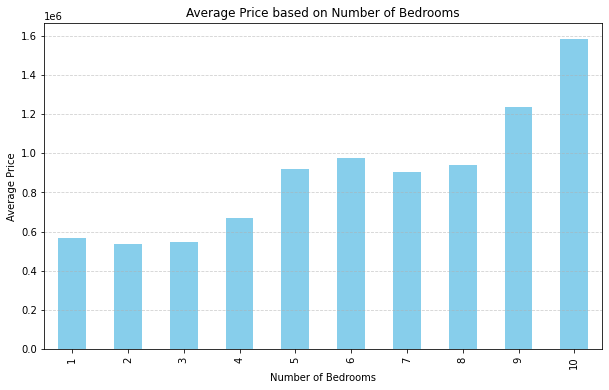

'd:/Dev/FDM training/Python Project Pod/exports/charts/temp_chart.png'

In [31]:
df.chat("plot price against bedroom as a bar graph")

In [10]:
suburb_table = df.chat("group suburbs by price average and keep price in non scientific numbers")
suburb_table

,Suburb,Price
0,Alexander Heights,446691.59
1,Alfred Cove,844247.37
2,Alkimos,415465.91
3,Anketell,1080000.00
4,Applecross,1404311.59
...,...,...
312,Wooroloo,471916.67
313,Wungong,744530.83
314,Yanchep,393240.96
315,Yangebup,468225.49


In [16]:
# make a heat map for suburb_table
suburb_table.chat("plot a heatmap")

"Unfortunately, I was not able to answer your question, because of the following error:\n\nPandas requires version '0.12.2' or newer of 'seaborn' (version '0.11.2' currently installed).\n"

In [22]:
df.chat("scatter plot of price against cbd_dist")

'Unfortunately, I was not able to answer your question, because of the following error:\n\nAll objects passed were None\n'

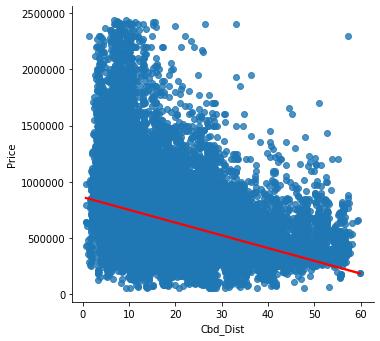

In [29]:
plot = sns.lmplot(x='Cbd_Dist', y='Price', data=df, line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [51]:
# round Build year to the nearest 10
build_year_table = df.chat("round build year to the floor 10")

In [52]:
build_year_table

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2000,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2010,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1970,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1950,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1990,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2010,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6
28188,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2010,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1
28189,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1990,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1
28190,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2010,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4


In [9]:
# Create a decade column
df['decade'] = (df['Build_Year'] // 10) * 10

# Group by the decade and calculate the average housing price for each decade
decade_avg_price = df.groupby('decade')['Price'].mean().reset_index()

In [10]:
decade_avg_price

,decade,Price
0,1860,1.150000e+06
1,1870,1.235000e+06
2,1880,8.816667e+05
3,1890,1.025455e+06
4,1900,9.805806e+05
5,1910,1.009423e+06
6,1920,9.721927e+05
7,1930,1.034304e+06
8,1940,9.827297e+05
9,1950,7.913417e+05


In [11]:
# Round the average housing price to the nearest whole number and convert to integer
decade_avg_price['Average Housing Price'] = decade_avg_price['Price'].round(0).astype(int)

# Drop the original 'housing_price' column as it's no longer needed
decade_avg_price.drop('Price', axis=1, inplace=True)

# Rename the 'decade' column for clarity
decade_avg_price.rename(columns={'decade': 'Decade'}, inplace=True)

In [12]:
decade_avg_price

,Decade,Average Housing Price
0,1860,1150000
1,1870,1235000
2,1880,881667
3,1890,1025455
4,1900,980581
5,1910,1009423
6,1920,972193
7,1930,1034304
8,1940,982730
9,1950,791342


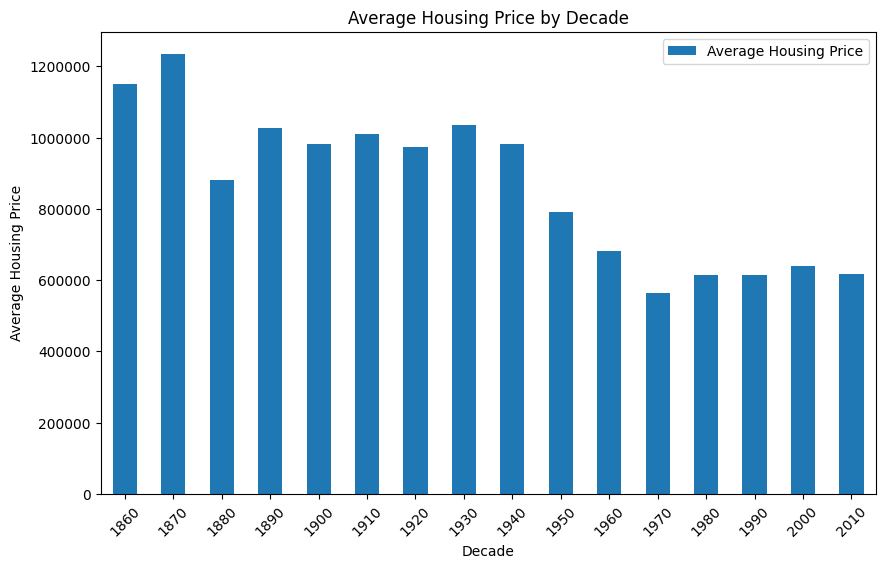

In [15]:
# plot average housing price against build year
ax = decade_avg_price.plot(kind='bar', x='Decade', y='Average Housing Price', legend=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Average Housing Price by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Set y-axis formatter to ScalarFormatter to remove scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useLocale=False))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

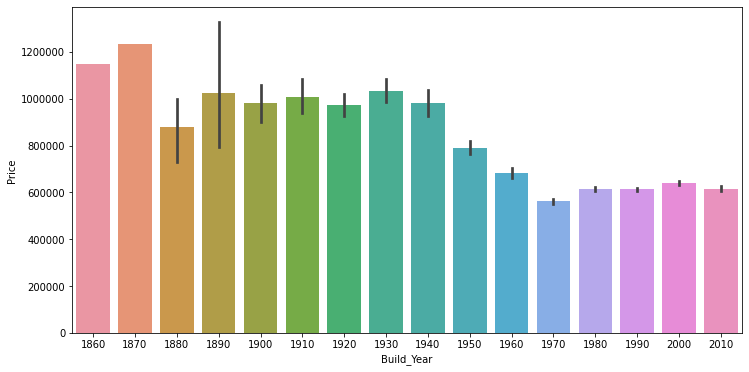

In [60]:
# plot price against build year
plt.figure(figsize=(12, 6))

# Now create the plot
plot = sns.barplot(x='Build_Year', y='Price', data=build_year_table)
plt.ticklabel_format(style='plain', axis='y')
plt.show()



AttributeError: This method only works with the ScalarFormatter

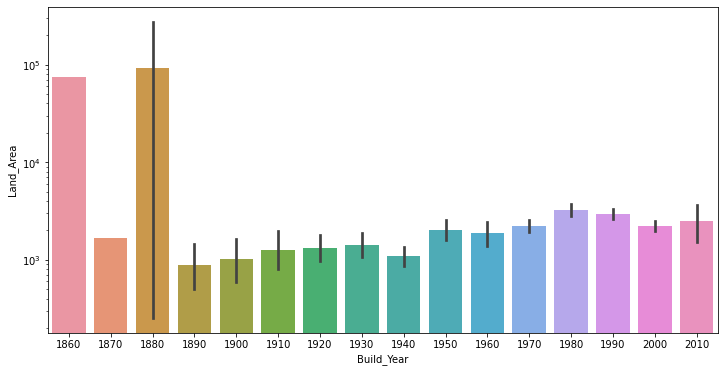

In [64]:
# plot build_year against land_area
plt.figure(figsize=(12, 6))

# Now create the plot
plot = sns.barplot(x='Build_Year', y='Land_Area', data=build_year_table)
plot.set_yscale("log")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [66]:
# from build_year_table show rows build_year = 1880
build_year_table.chat("show me the rows where build year is 1880 and 1860")

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist
11178,237 Lowlands Road,Mardella,1150000,3,2,3,74993,86,1860,43.8,Warnbro Station,17.7,07-2015,6125,Court Grammar School,8.2
12210,26 Holdsworth Street,Fremantle,915000,4,2,2,253,104,1880,15.1,Fremantle Station,0.7,08-2018,6160,Christian Brothers' College,0.2
14982,31 Fisher Road,Keysbrook,1000000,2,2,1,275824,334,1880,52.8,Armadale Station,29.0,03-2013,6126,Court Grammar School,16.0
26499,81 James Street,Guildford,730000,3,3,3,696,137,1880,12.3,Guildford Station,0.8,02-2014,6055,Guildford Grammar School,1.0


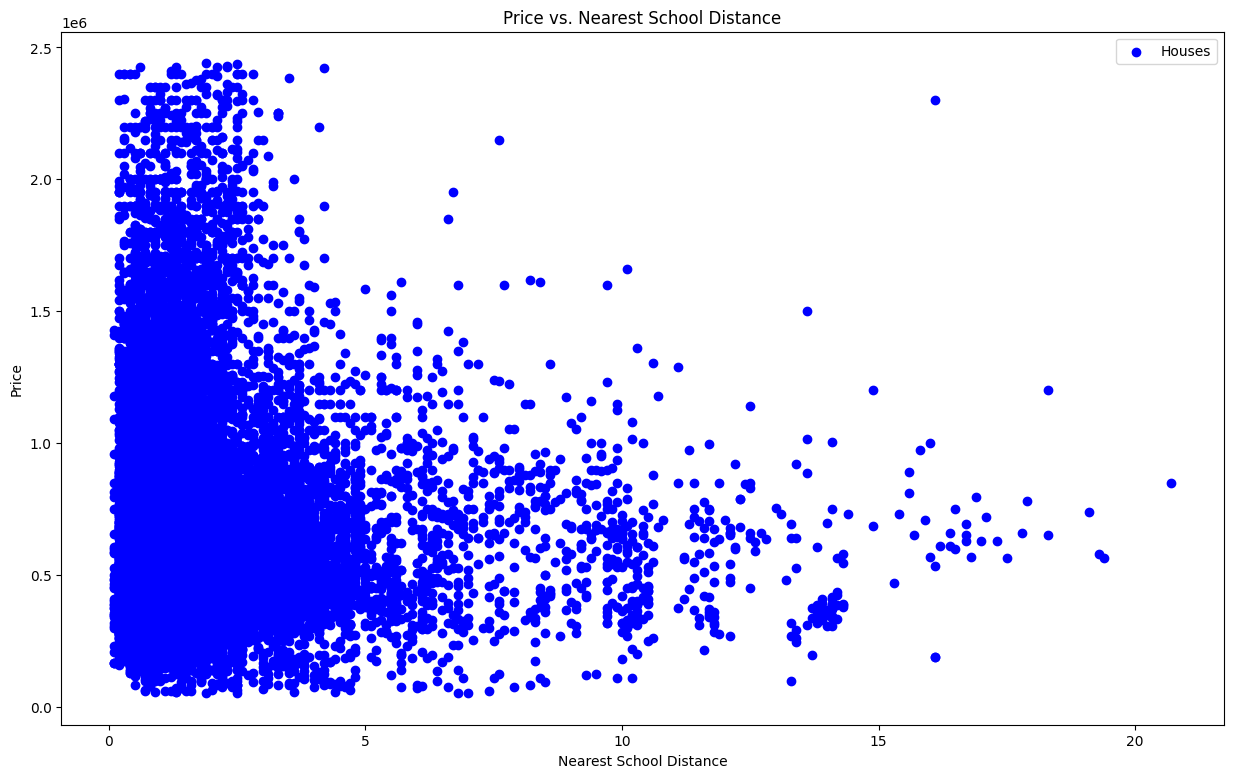

In [34]:
# Set the figure size for a larger plot
plt.figure(figsize=(15, 9))  # Width, height in inches

# Scatter plot
plt.scatter(df['Nearest_Sch_Dist'], df['Price'], color='blue', label='Houses')

# # Calculate the trend line
# z = np.polyfit(df['Nearest_Sch_Dist'], df['Price'], 1)
# p = np.poly1d(z)

# # Plot the trend line
# plt.plot(df['Nearest_Sch_Dist'], p(df['Nearest_Sch_Dist']), "r--", label='Trend Line')

# # Calculate quartiles
# lower_quartile = np.percentile(df['Price'], 25)
# upper_quartile = np.percentile(df['Price'], 75)

# Draw quartile lines
# plt.axhline(lower_quartile, color='green', linestyle='--', label='Lower Quartile')
# plt.axhline(upper_quartile, color='purple', linestyle='--', label='Upper Quartile')

# Adjusting plot scale
# plt.xlim(left=min(df['Nearest_Sch_Dist']) - 1, right=max(df['Nearest_Sch_Dist']) + 1)  # Widen x-axis scale
# plt.ylim(bottom=min(df['Price']) - 50, top=max(df['Price']) + 50)  # Widen y-axis scale

# Adding labels and title
plt.xlabel('Nearest School Distance')
plt.ylabel('Price')
plt.title('Price vs. Nearest School Distance')
plt.legend()

plt.show()

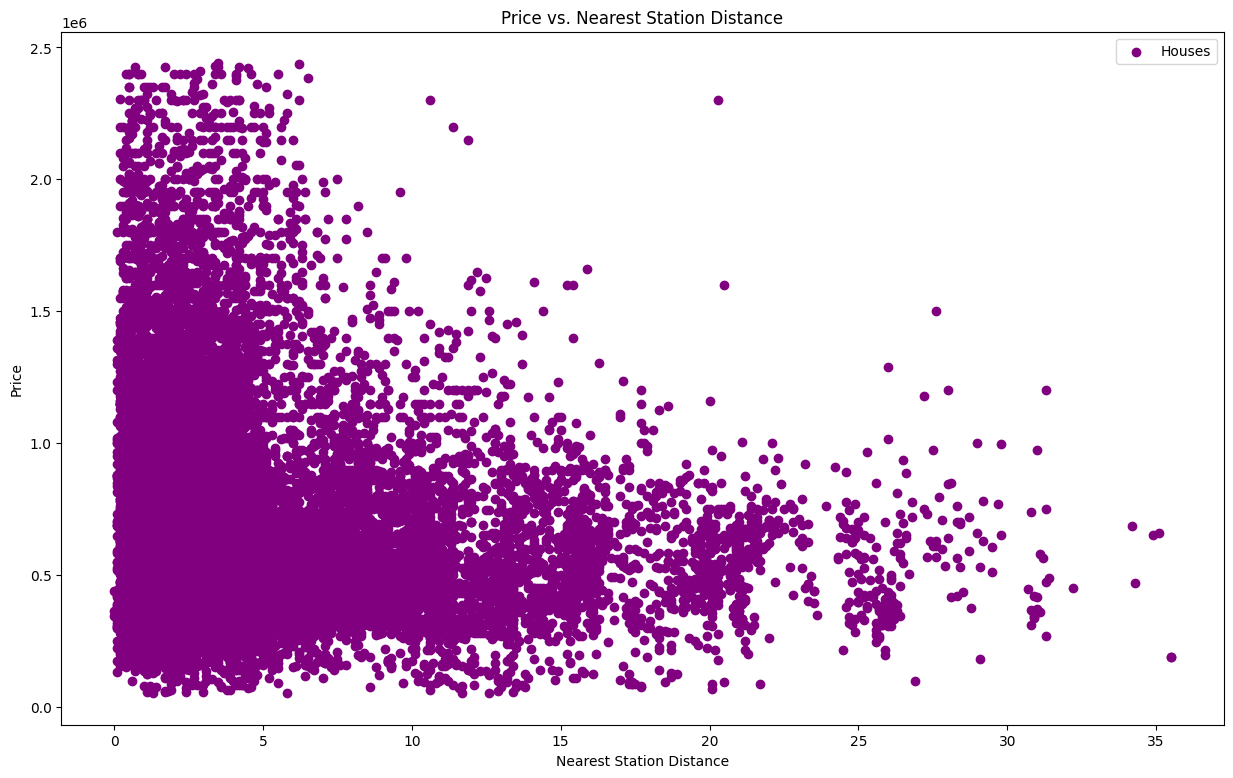

In [33]:
plt.figure(figsize=(15, 9))  # Width, height in inches

# plot price against nearest station distance
plt.scatter(df['Nearest_Stn_Dist'], df['Price'], color='purple', label='Houses')

# Calculate the trend line
z = np.polyfit(df['Nearest_Stn_Dist'], df['Price'], 1)
p = np.poly1d(z)


# Adding labels and title
plt.xlabel('Nearest Station Distance')
plt.ylabel('Price')
plt.title('Price vs. Nearest Station Distance')
plt.legend()


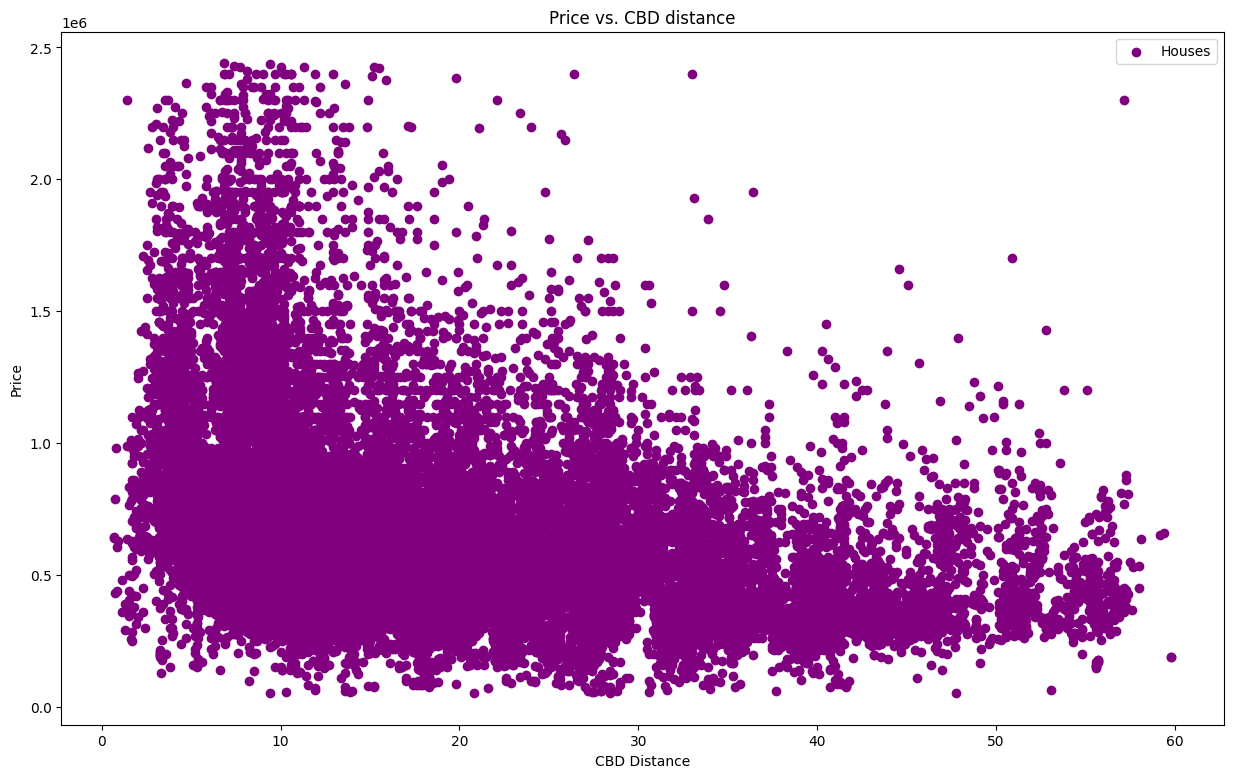

In [35]:
plt.figure(figsize=(15, 9))  # Width, height in inches

# plot price against nearest CBD distance
plt.scatter(df['Cbd_Dist'], df['Price'], color='purple', label='Houses')

# Calculate the trend line
z = np.polyfit(df['Cbd_Dist'], df['Price'], 1)
p = np.poly1d(z)


# Adding labels and title
plt.xlabel('CBD Distance')
plt.ylabel('Price')
plt.title('Price vs. CBD distance')
plt.legend()
plt.show()

In [83]:
# show coutn for number of unique schools
df.chat("show me the count for each unique value for Nearest_Sch order by ascending")

,index,count
0,Alkimos Baptist College,303
1,All Saints' College,113
2,Alta-1,235
3,Applecross Senior High School,339
4,Aquinas College,244
...,...,...
155,Wesley College,75
156,Willetton Senior High School,64
157,Woodvale Secondary College,84
158,Yanchep Secondary College,218


In [87]:
# show correlation matrix
df.chat("show me the correlation matrix")

<string>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Postcode,Nearest_Sch_Dist
Price,1.000000,0.269067,0.392369,0.155329,0.053722,0.566181,-0.161523,-0.358833,-0.090563,-0.173024,-0.013767
Bedrooms,0.269067,1.000000,0.564745,0.232984,0.049344,0.550842,0.222777,0.124219,0.109116,0.010454,0.092388
Bathrooms,0.392369,0.564745,1.000000,0.224448,0.030689,0.579650,0.343946,0.032603,0.047830,-0.042940,0.070464
Garage,0.155329,0.232984,0.224448,1.000000,0.050190,0.236303,0.047266,0.037216,0.115719,0.032973,0.101537
Land_Area,0.053722,0.049344,0.030689,0.050190,1.000000,0.063602,0.004956,0.117645,0.210259,0.033879,0.252179
Floor_Area,0.566181,0.550842,0.579650,0.236303,0.063602,1.000000,0.222387,0.014905,0.103222,-0.056236,0.114794
Build_Year,-0.161523,0.222777,0.343946,0.047266,0.004956,0.222387,1.000000,0.273383,0.109379,0.046022,0.111516
Cbd_Dist,-0.358833,0.124219,0.032603,0.037216,0.117645,0.014905,0.273383,1.000000,0.432796,0.248485,0.361357
Nearest_Stn_Dist,-0.090563,0.109116,0.047830,0.115719,0.210259,0.103222,0.109379,0.432796,1.000000,0.172963,0.617157
Postcode,-0.173024,0.010454,-0.042940,0.032973,0.033879,-0.056236,0.046022,0.248485,0.172963,1.000000,0.102095


In [16]:
# Save the DataFrame as a JSON file
df.to_json('data.json', orient='records', lines=True)

In [17]:
df.describe()

,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Postcode,Nearest_Sch_Dist,decade
count,2.819200e+04,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000,28192.000000
mean,6.428262e+05,3.672815,1.840451,2.164408,2467.446687,183.198957,1989.964671,19.531692,4.404813,6088.317750,1.764667,1985.712614
std,3.562714e+05,0.738864,0.583199,1.052672,16579.690396,71.582475,20.682103,11.277746,4.335169,60.342777,1.663601,20.634712
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,0.681000,0.000000,6003.000000,0.100000,1860.000000
25%,4.120000e+05,3.000000,2.000000,2.000000,504.000000,130.000000,1979.000000,11.100000,1.700000,6037.750000,0.900000,1970.000000
50%,5.400000e+05,4.000000,2.000000,2.000000,681.000000,172.000000,1995.000000,17.200000,3.200000,6069.000000,1.300000,1990.000000
75%,7.700000e+05,4.000000,2.000000,2.000000,819.000000,222.000000,2005.000000,26.200000,5.200000,6149.000000,2.100000,2000.000000
max,2.440000e+06,10.000000,16.000000,10.000000,999999.000000,849.000000,2017.000000,59.800000,35.500000,6558.000000,20.700000,2010.000000


In [2]:
# read in json file
df = pd.read_json('data/cleaned_v1.2.json', lines=True)

In [3]:
df

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist,decade
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8,2000
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5,2010
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6,1970
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6,1950
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6,2010
28188,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1,2010
28189,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1,1990
28190,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4,2010


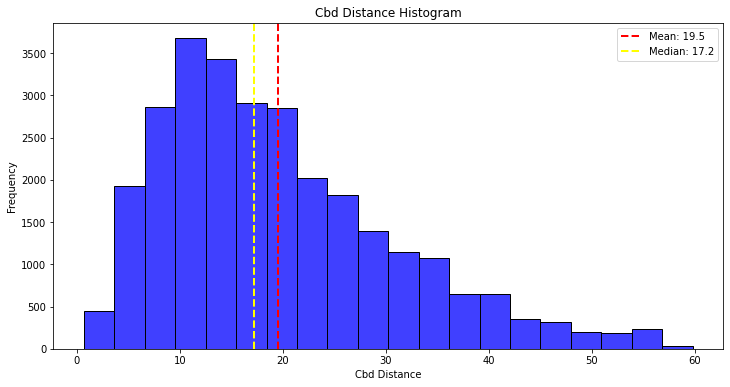

In [21]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a histogram of 'Cbd_Dist'
sns.histplot(df['Cbd_Dist'], bins=20, color='blue')


# Calculate the mean and median
mean = round(np.mean(df['Cbd_Dist']),1)
median = np.median(df['Cbd_Dist'])

# Add vertical lines for the mean and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
plt.axvline(median, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median}')

plt.xlabel('Cbd Distance')
plt.ylabel('Frequency')
plt.title('Cbd Distance Histogram')
plt.legend()
plt.show()


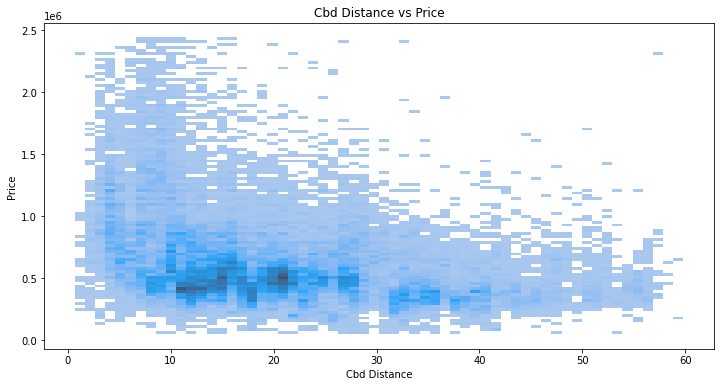

In [11]:
plt.figure(figsize=(12, 6))

# Create a scatter plot of 'Cbd_Dist' against 'Price'
sns.histplot(x='Cbd_Dist', y='Price', data=df)

plt.xlabel('Cbd Distance')
plt.ylabel('Price')
plt.title('Cbd Distance vs Price')
plt.show()

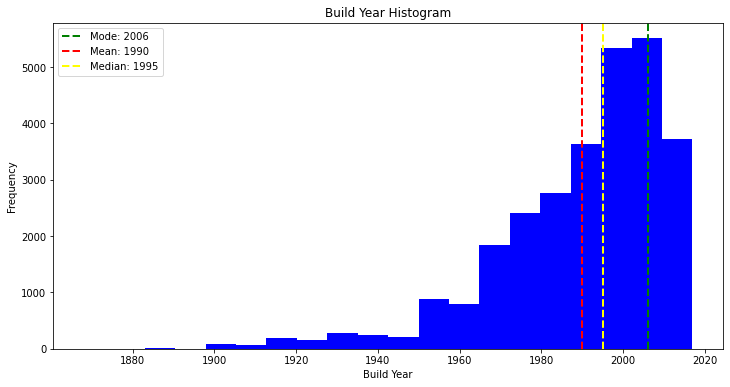

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(df['Build_Year'], bins=20, color='blue')

# Calculate the mode, mean, and median
mode = df['Build_Year'].mode()[0]
mean = int(round(df['Build_Year'].mean(),0))
median = int(round(df['Build_Year'].median(),0))

# Add vertical lines for the mode, mean, and median
plt.axvline(mode, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode}')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
plt.axvline(median, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median}')

plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Build Year Histogram')
plt.legend()
plt.show()

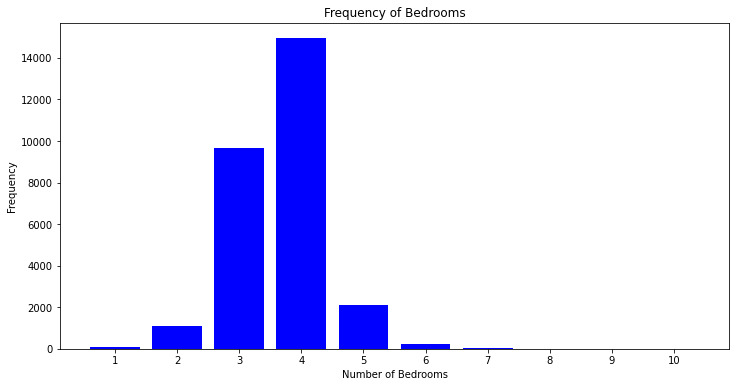

In [34]:
# Calculate the frequency of each unique number of bedrooms
bedroom_counts = df['Bedrooms'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar graph of the frequency of bedrooms
plt.bar(bedroom_counts.index, bedroom_counts.values, color='blue')

# Label each bar on the x-axis
plt.xticks(bedroom_counts.index)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Frequency of Bedrooms')
plt.show()

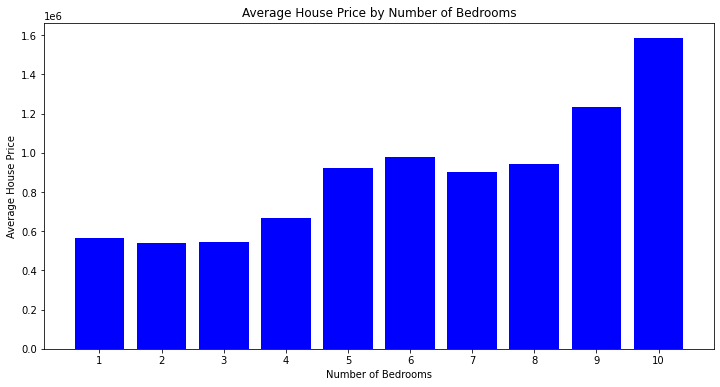

In [35]:
# Group the dataframe by the number of bedrooms and calculate the average house price
avg_price_by_bedroom = df.groupby('Bedrooms')['Price'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar graph of the average house price against the number of bedrooms
plt.bar(avg_price_by_bedroom.index, avg_price_by_bedroom.values, color='blue')

# Label each bar on the x-axis
plt.xticks(avg_price_by_bedroom.index)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average House Price')
plt.title('Average House Price by Number of Bedrooms')
plt.show()


In [9]:
df = pd.read_json('data/cleaned_v1.2.json', lines=True)

# Machine Learning Libraries

In [4]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
# warnings.filterwarnings('ignore')

C:\Users\2much\AppData\Local\Temp\ipykernel_34940\3066829697.py:3: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [42]:
df = pd.read_json('data/cleaned_v1.2.json', lines=True)

In [15]:
# split df into training and testing data 80-20
# set random seed for reproducibility
np.random.seed(200)
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

In [10]:
df

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist,decade
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8,2000
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5,2010
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6,1970
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6,1950
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6,2010
28188,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1,2010
28189,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1,1990
28190,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4,2010


In [16]:
test

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist,decade
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6,1950
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5,1990
5,1 Amethyst Crescent,Mount Richon,409000,4,2,1,759,118,1991,27.3,Armadale Station,1.0,03-2013,6112,Armadale Senior High School,1.2,1990
17,1 Babbler Court,Maida Vale,570000,4,2,2,568,225,2003,15.3,Midland Station,7.0,10-2020,6057,Darling Range Sports College,2.7,2000
18,1 Balga Place,Koongamia,318000,2,1,3,751,90,1959,18.1,Midland Station,4.1,05-2013,6056,Swan View Senior High School,1.9,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28168,9A Radici Link,Sinagra,405000,3,2,2,301,135,2012,24.0,Joondalup Station,3.1,02-2016,6065,Wanneroo Secondary College,2.3,2010
28171,9A Towning Street,Embleton,530000,3,2,2,396,132,2011,7.6,Bayswater Station,1.9,05-2015,6062,John Forrest Secondary College,1.1,2010
28175,9B Charles East Street,Midland,330000,3,2,2,1013,130,2007,16.9,Midland Station,1.9,10-2015,6056,La Salle College,1.4,2000
28181,9B Longfield Road,Maddington,240000,3,1,1,480,112,1978,16.8,Madding,0.9,09-2019,6109,St Francis' School,1.0,1970


In [12]:
train

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist,decade
20131,5 Boogalla Court,South Lake,565000,4,2,2,550,160,2005,18.3,Cockburn Central Station,1.6,10-2015,6164,Lakeland Senior High School,0.8,2000
14565,3/68 Downey Drive,Manning,620000,3,1,2,495,131,1992,6.8,Canning Bridge Station,1.6,09-2016,6152,Como Secondary College,1.0,1990
16812,38 Denny Way,Parkwood,590000,4,2,2,769,141,1989,11.1,Thornlie Station,4.4,03-2017,6147,Lynwood Senior High School,1.0,1980
23420,62 Monument Street,Mosman Park,1015000,3,1,1,524,145,1940,11.5,Vic,0.6,11-2020,6012,Iona Presentation College,0.9,1940
27787,91 Huntsman Terrace,Jane Brook,590000,4,2,2,722,224,2004,21.2,Midland Station,6.2,10-2014,6056,Swan View Senior High School,3.5,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,19 Hicks Way,Hillarys,520000,4,1,2,590,133,1974,19.9,Whitfords Station,3.1,08-2018,6025,St Mark'S Anglican Community School,0.6,1970
25570,79 Southgate Road,Langford,415000,4,2,2,436,161,2004,12.6,Thornlie Station,1.4,05-2020,6147,Langford Islamic College,0.3,2000
10614,22 Whitmore Terrace,Heathridge,565000,4,2,2,480,191,2002,23.0,Edgewater Station,2.5,06-2019,6027,Belridge Secondary College,1.1,2000
9356,20 Jindare Loop,Carramar,470000,4,2,2,616,173,2004,27.5,Currambine Station,4.5,03-2018,6031,Joseph Banks Secondary College,1.4,2000


In [18]:
print("\nThe train data size: {} ".format(train.shape)) 
print("The test data size: {} ".format(test.shape))


The train data size: (22554, 17) 
The test data size: (5638, 17) 


C:\Users\2much\AppData\Local\Temp\ipykernel_34940\1032825789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


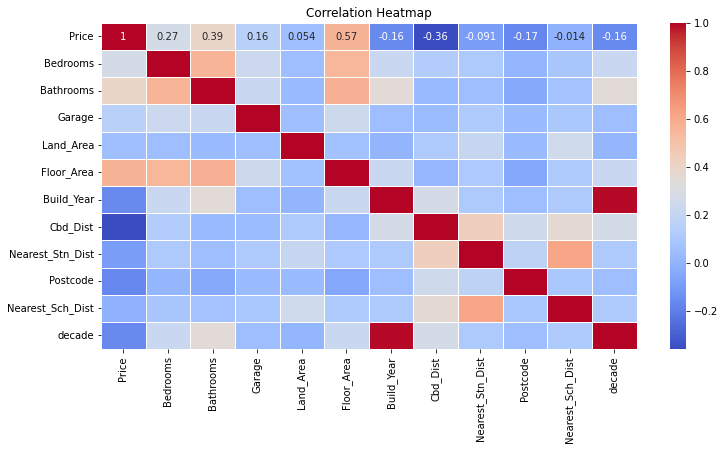

In [22]:
# correlation matrix heat map
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Nearest_Sch,Nearest_Sch_Dist,decade
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18.3,Cockburn Central Station,1.8,09-2018,6164,Lakeland Senior High School,0.8,2000
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26.9,Kwinana Station,4.9,02-2019,6167,Atwell College,5.5,2010
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22.6,Challis Station,1.9,06-2015,6111,Kelmscott Senior High School,1.6,1970
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17.9,Midland Station,3.6,07-2018,6056,Swan View Senior High School,1.6,1950
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11.2,Bassendean Station,2.0,11-2016,6054,Kiara College,1.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24.9,Cockburn Central Station,5.7,05-2016,6164,Atwell College,3.6,2010
28188,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17.1,Midland Station,2.5,04-2015,6056,La Salle College,1.1,2010
28189,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16.0,Fremantle Station,1.9,02-2019,6162,Fremantle College,1.1,1990
28190,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16.1,Fremantle Station,1.5,03-2016,6162,Christian Brothers' College,1.4,2010


In [23]:
# Check catergorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Address', 'Suburb', 'Nearest_Stn', 'Date_Sold', 'Nearest_Sch'], dtype='object')

In [25]:
# Process columns and apply LabelEncoder to categorical features
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Check shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (28192, 17)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X = df[['Bathrooms', 'Floor_Area']]
y = df['Price']

# Splitting data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:


# Create a Ridge regression model
ridge_model = Lasso()

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = ridge_model.predict(X_test)


In [60]:


# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Dictionary to hold evaluation metrics
metrics = {}

# Splitting data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    metrics[name] = {'RMSE': rmse, 'R^2': r2}

metrics_df = pd.DataFrame(metrics).T
metrics_df

,RMSE,R^2
Linear Regression,284868.659274,0.334285
Lasso Regression,284868.655316,0.334285
Decision Tree Regressor,297774.791580,0.272598
Random Forest Regressor,289199.132895,0.313892
Gradient Boosting Regressor,277980.478032,0.366090


In [33]:
model.score(X_train, y_train)

0.32439595319248316